# Analyisis and vizualization

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns

# Load the data
df = pd.read_csv('../data/weekly_combined_prepared.csv')

### Max weeks and high death weeks

In [2]:
# Week with the most cases, deaths, and vaccinations
stats_summary = {
    'max_cases': df['new_cases'].max(),
    'max_deaths': df['weekly_deaths'].max(),
    'max_vaccines': df['weekly_vaccinations'].max()
}

# Convert stats_summary to a DataFrame for better visualization
stats_df = pd.DataFrame(stats_summary.items(), columns=['Metric', 'Value'])
print(stats_df)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# High death weeks
high_death_weeks = df[df['weekly_deaths'] > 550][['date', 'weekly_deaths']]

# Extract only the date part
high_death_weeks['date'] = high_death_weeks['date'].dt.date  

# Display the high death weeks
print("Wochen mit mehr als 550 Todesfällen:")
for _, row in high_death_weeks.iterrows():
    print(f"Date: {row['date']}, Deaths: {row['weekly_deaths']}")

         Metric    Value
0     max_cases   249378
1    max_deaths      644
2  max_vaccines  1339905
Wochen mit mehr als 550 Todesfällen:
Date: 2020-11-02, Deaths: 559
Date: 2020-11-09, Deaths: 631
Date: 2020-11-16, Deaths: 632
Date: 2020-11-23, Deaths: 623
Date: 2020-11-30, Deaths: 605
Date: 2020-12-07, Deaths: 607
Date: 2020-12-14, Deaths: 644
Date: 2020-12-21, Deaths: 593
Date: 2020-11-02, Deaths: 559
Date: 2020-11-09, Deaths: 631
Date: 2020-11-16, Deaths: 632
Date: 2020-11-23, Deaths: 623
Date: 2020-11-30, Deaths: 605
Date: 2020-12-07, Deaths: 607
Date: 2020-12-14, Deaths: 644
Date: 2020-12-21, Deaths: 593
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Deaths: 559
Date: 2020-11-02, Death

### Classifying the weeks by new cases

In [3]:
# Classify weeks based on new cases
def classify_week(row):
    if row['new_cases'] > 40000:
        return 'critical'
    elif row['new_cases'] > 10000:
        return 'high'
    else:
        return 'moderate'

df['case_severity'] = df.apply(classify_week, axis=1)
df['case_severity'].value_counts()

case_severity
moderate    6694
high         298
critical      64
Name: count, dtype: int64

### Weekly Cases per 100k 

In [4]:
# Calculating the weekly cases per 100k population
def calculate_per_100k(value, population):
    return value / population * 100000

df['weekly_cases_per_100k'] = calculate_per_100k(df['new_cases'], df['population'])

### Course of time: Vaccinations and cases

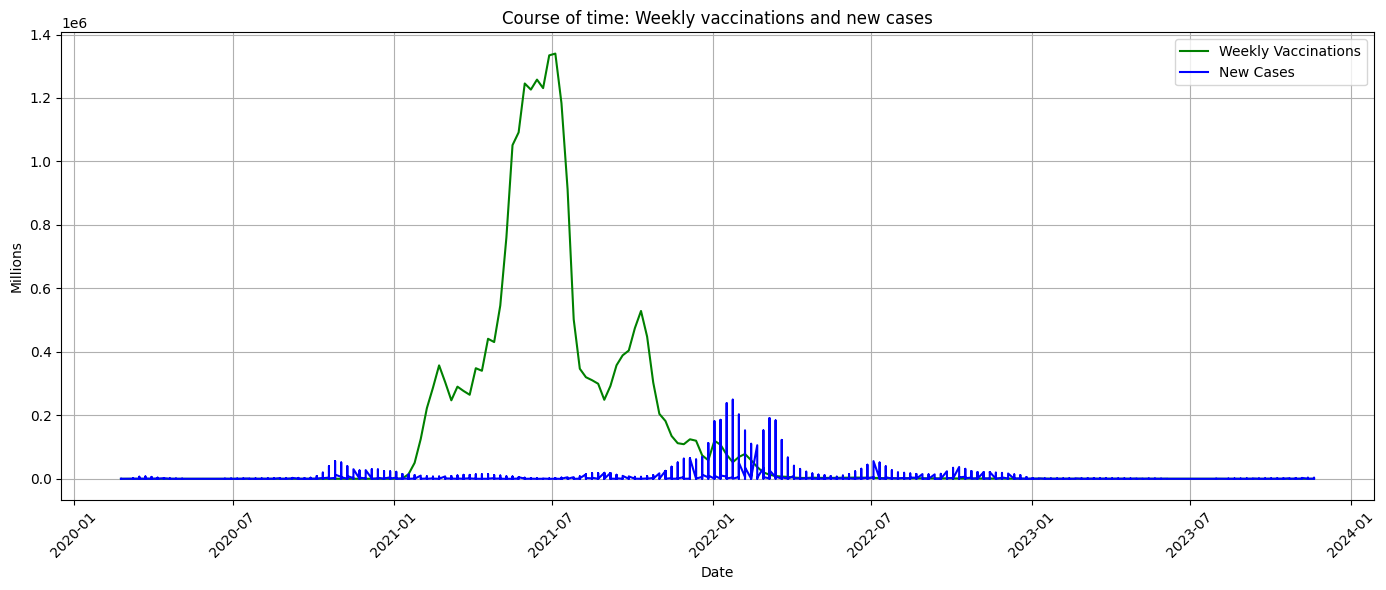

In [5]:
# Ensure the data is sorted by date
df = df.sort_values(by='date')

# Create the plot
plt.figure(figsize=(14, 6))

# Plot weekly vaccinations
plt.plot(df['date'], df['weekly_vaccinations'], label='Weekly Vaccinations', color='green')

# Plot new cases
plt.plot(df['date'], df['new_cases'], label='New Cases', color='blue')

# Add labels, title, and legend
plt.title('Course of time: Weekly vaccinations and new cases')
plt.xlabel('Date')
plt.ylabel('Millions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Correlation between vaccinations and new cases

Correlation between vaccinations and new cases: -0.04, p-value: 0.00113


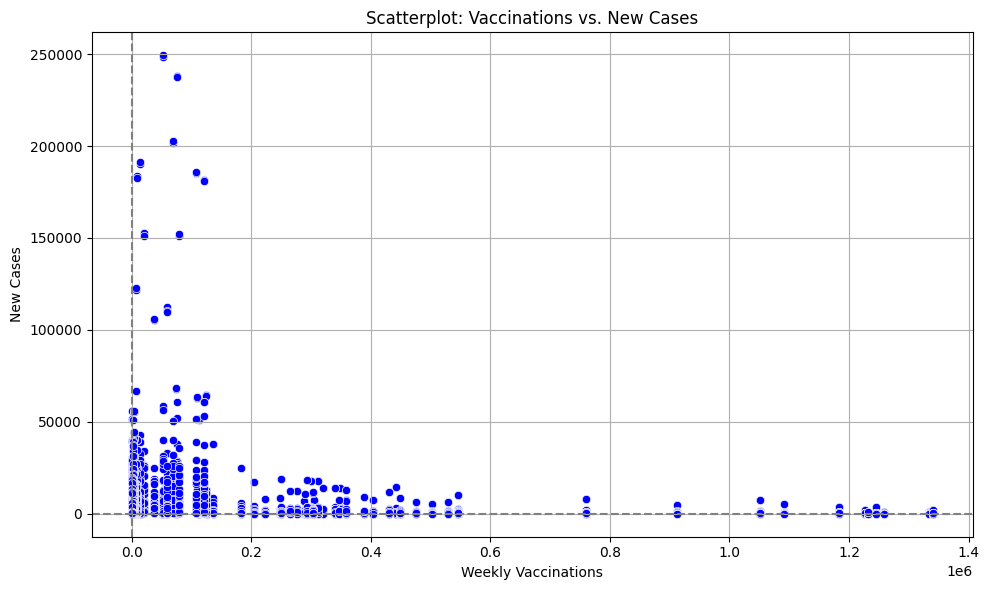

In [6]:
# Calculate the correlation coefficient and p-value
corr, p_value = pearsonr(df['weekly_vaccinations'], df['new_cases'])

# Display the correlation coefficient
print(f'Correlation between vaccinations and new cases: {corr:.2f}, p-value: {p_value:.5f}')

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_vaccinations', y='new_cases', color='blue')

# Add labels, title, and grid
plt.title('Scatterplot: Vaccinations vs. New Cases')
plt.xlabel('Weekly Vaccinations')
plt.ylabel('New Cases')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Course of time: Vaccinations and deaths

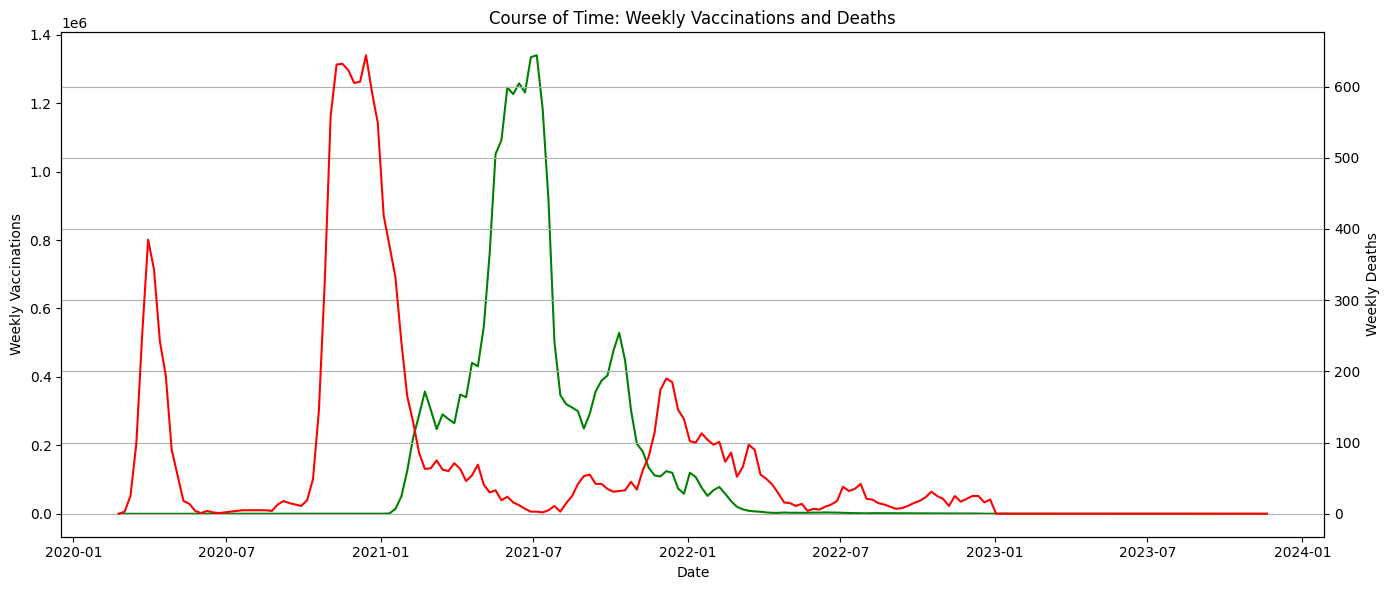

In [7]:
# Ensure the data is sorted by date
df = df.sort_values(by='date')

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot weekly vaccinations on the first y-axis
ax1.plot(df['date'], df['weekly_vaccinations'], label='Weekly Vaccinations', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Vaccinations', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for weekly deaths
ax2 = ax1.twinx()
ax2.plot(df['date'], df['weekly_deaths'], label='Weekly Deaths', color='red')
ax2.set_ylabel('Weekly Deaths', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and grid
plt.title('Course of Time: Weekly Vaccinations and Deaths')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Correlation between vaccinations and deaths

Correlation between vaccinations and deaths: -0.11, p-value: 0.00000


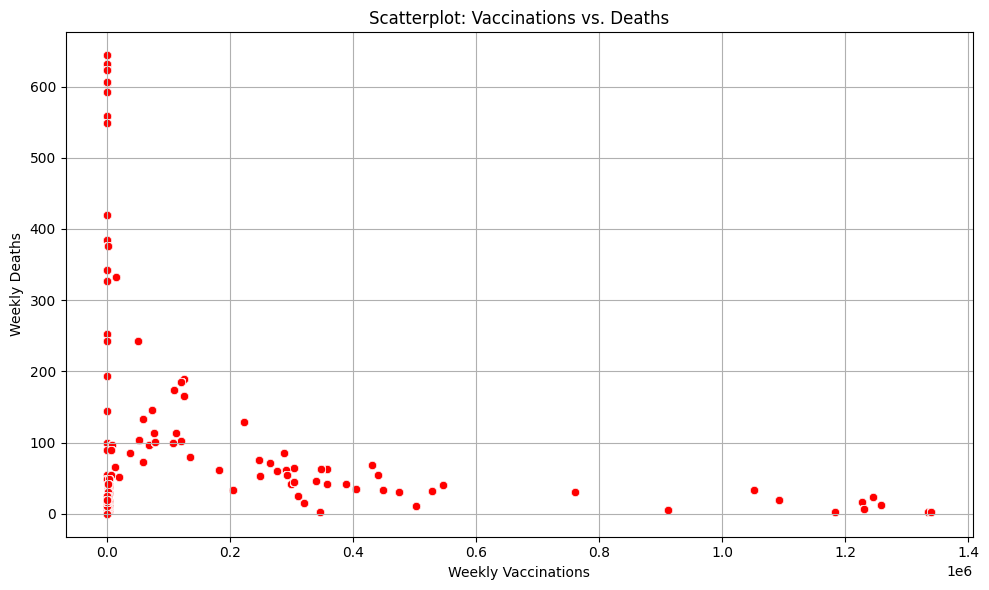

In [8]:
# Calculate the correlation coefficient and p-value
corr, p_value = pearsonr(df['weekly_vaccinations'], df['weekly_deaths'])

# Display the correlation coefficient
print(f'Correlation between vaccinations and deaths: {corr:.2f}, p-value: {p_value:.5f}')

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_vaccinations', y='weekly_deaths', color='red')

# Add labels, title, and grid
plt.title('Scatterplot: Vaccinations vs. Deaths')
plt.xlabel('Weekly Vaccinations')
plt.ylabel('Weekly Deaths')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### T-Test

In [9]:
# Ensure 'week_str' is a string
df['week_str'] = df['week_str'].astype(str)

# Perform the filtering
before = df[df['week_str'] < '202052']['weekly_deaths']
after = df[df['week_str'] >= '202052']['weekly_deaths']

# Perform the T-test
t_stat, p_val = ttest_ind(before, after, equal_var=False)
print(f'T-Test Ergebnis: t={t_stat:.2f}, p={p_val:.5f}')

T-Test Ergebnis: t=18.47, p=0.00000


### Boxplot of the deaths before vs. after vaccination start

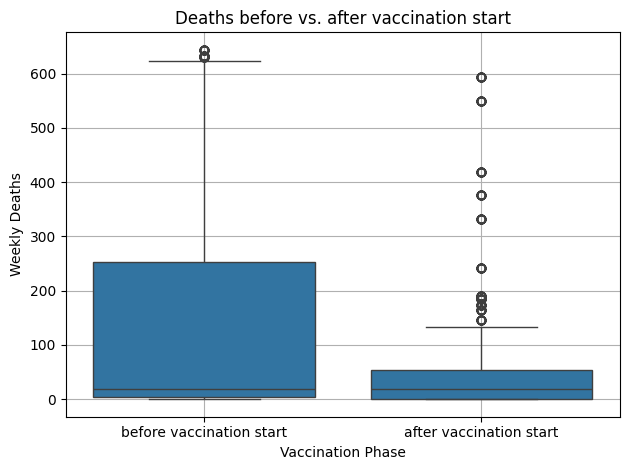

In [10]:
# Ensure 'week_str' is a string
df['week_str'] = df['week_str'].astype(str)

# Create a new column 'impf_phase' based on the comparison
df['impf_phase'] = df['week_str'].apply(lambda x: 'before vaccination start' if x < '202052' else 'after vaccination start')

# Create the boxplot
sns.boxplot(x='impf_phase', y='weekly_deaths', data=df)
plt.title('Deaths before vs. after vaccination start')
plt.xlabel('Vaccination Phase')
plt.ylabel('Weekly Deaths')
plt.grid()
plt.tight_layout()
plt.show()

### Heatmap of weekly vaccinations

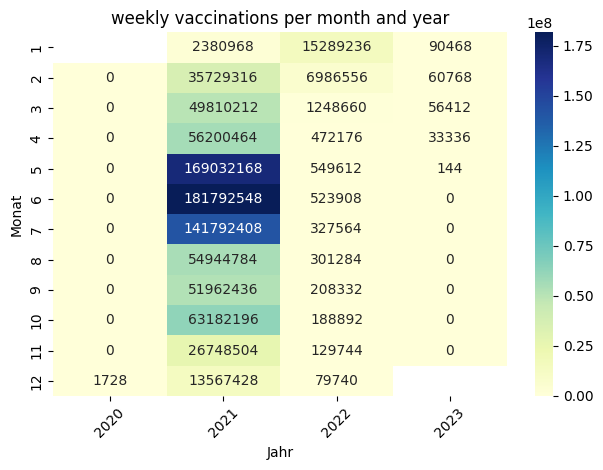

In [11]:
# heatmap of weekly vaccinations
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
pivot = df.pivot_table(index='month', columns='year', values='weekly_vaccinations', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('weekly vaccinations per month and year')
plt.ylabel('Monat')
plt.xlabel('Jahr')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lag analysis

In [12]:
# lagged correlation of 2 weeks
df['vacc_lag2'] = df['weekly_vaccinations'].shift(2)
lag_corr, lag_p = pearsonr(df['vacc_lag2'].fillna(0), df['weekly_deaths'])
print(f'Lag-correlation (Vaccinations - 2 weeks after deaths): r={lag_corr:.2f}, p={lag_p:.5f}')

Lag-correlation (Vaccinations - 2 weeks after deaths): r=-0.11, p=0.00000
